In [1]:
# import the important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df= pd.read_csv('cars.csv')

df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
df.nunique()

Make                    33
Model                 1050
Price                  619
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

## Step 1: Clean and Extract Numeric Info

In [6]:
# Engine: extract numeric cc
df['Engine'] = df['Engine'].str.extract(r'(\d+)', expand=False).astype(float)

In [7]:
# Max Power: extract bhp and rpm
df['Max_Power_bhp'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max_Power_rpm'] = df['Max Power'].str.extract(r'@ *(\d+)', expand=False).astype(float)

In [8]:
# Max Torque: normalize spacing and extract values
df['Max Torque'] = df['Max Torque'].str.replace(r'(\d)([a-zA-Z])', r'\1 \2', regex=True)
df['Max_Torque_Nm'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max_Torque_rpm'] = df['Max Torque'].str.extract(r'@ *(\d+)', expand=False).astype(float)

In [9]:
# Drop original Max Power and Max Torque
df.drop(columns=['Max Power', 'Max Torque'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   float64
 12  Drivetrain          1923 non-null   object 
 13  Length              1995 non-null   float64
 14  Width               1995 non-null   float64
 15  Height              1995 non-null   float64
 16  Seatin


## Step 2: Handle Missing Values


In [12]:
from sklearn.impute import SimpleImputer

# Numeric imputation (mean)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [13]:
# Categorical imputation (mode)
cat_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


## Step 3: Encode Categorical Variables


In [15]:
from sklearn.preprocessing import LabelEncoder


# Label encode high-cardinality columns
label_encode_cols = ['Make','Model','Location','Color']
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
# One-hot encode other categorical columns
remaining_cats = [col for col in cat_cols if col not in label_encode_cols]
df = pd.get_dummies(df, columns=remaining_cats, drop_first=True,dtype =int)

In [17]:
print("Preprocessing complete. Cleaned dataset preview:")
df.head()

Preprocessing complete. Cleaned dataset preview:


,Make,Model,Price,Year,Kilometer,Location,Color,Engine,Length,Width,...,Transmission_Manual,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,7,106,505000.0,2017.0,87150.0,56,7,1198.0,3990.0,1680.0,...,1,1,0,0,0,0,1,0,1,0
1,19,802,450000.0,2014.0,75000.0,40,15,1248.0,3995.0,1695.0,...,1,0,0,1,0,0,0,1,1,0
2,8,1030,220000.0,2011.0,67000.0,39,8,1197.0,3585.0,1595.0,...,1,1,0,0,0,0,0,1,1,0
3,30,492,799000.0,2019.0,37500.0,41,13,1197.0,3995.0,1745.0,...,1,1,0,0,0,0,0,1,1,0
4,30,548,1950000.0,2018.0,69000.0,45,7,2393.0,4735.0,1830.0,...,1,1,0,0,0,0,0,1,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    2059 non-null   int32  
 1   Model                   2059 non-null   int32  
 2   Price                   2059 non-null   float64
 3   Year                    2059 non-null   float64
 4   Kilometer               2059 non-null   float64
 5   Location                2059 non-null   int32  
 6   Color                   2059 non-null   int32  
 7   Engine                  2059 non-null   float64
 8   Length                  2059 non-null   float64
 9   Width                   2059 non-null   float64
 10  Height                  2059 non-null   float64
 11  Seating Capacity        2059 non-null   float64
 12  Fuel Tank Capacity      2059 non-null   float64
 13  Max_Power_bhp           2059 non-null   float64
 14  Max_Power_rpm           2059 non-null   

In [19]:
df

,Make,Model,Price,Year,Kilometer,Location,Color,Engine,Length,Width,...,Transmission_Manual,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,7,106,505000.0,2017.0,87150.0,56,7,1198.0,3990.0,1680.0,...,1,1,0,0,0,0,1,0,1,0
1,19,802,450000.0,2014.0,75000.0,40,15,1248.0,3995.0,1695.0,...,1,0,0,1,0,0,0,1,1,0
2,8,1030,220000.0,2011.0,67000.0,39,8,1197.0,3585.0,1595.0,...,1,1,0,0,0,0,0,1,1,0
3,30,492,799000.0,2019.0,37500.0,41,13,1197.0,3995.0,1745.0,...,1,1,0,0,0,0,0,1,1,0
4,30,548,1950000.0,2018.0,69000.0,45,7,2393.0,4735.0,1830.0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,999,850000.0,2016.0,90300.0,67,15,2179.0,4585.0,1890.0,...,1,1,0,0,0,0,0,1,1,0
2055,8,414,275000.0,2014.0,83000.0,1,15,814.0,3495.0,1550.0,...,1,0,0,1,0,0,0,1,1,0
2056,6,455,240000.0,2013.0,73000.0,68,14,1196.0,3795.0,1680.0,...,1,1,0,0,0,0,0,1,1,0
2057,1,13,4290000.0,2018.0,60474.0,12,15,1995.0,4936.0,1868.0,...,0,1,0,0,0,0,0,1,0,1


## EDA

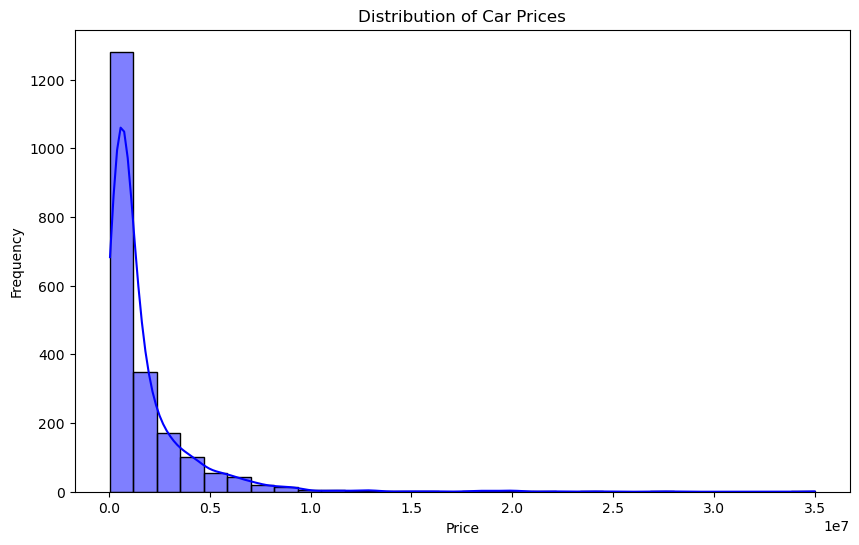

In [167]:
# Distribution of the 'Price' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


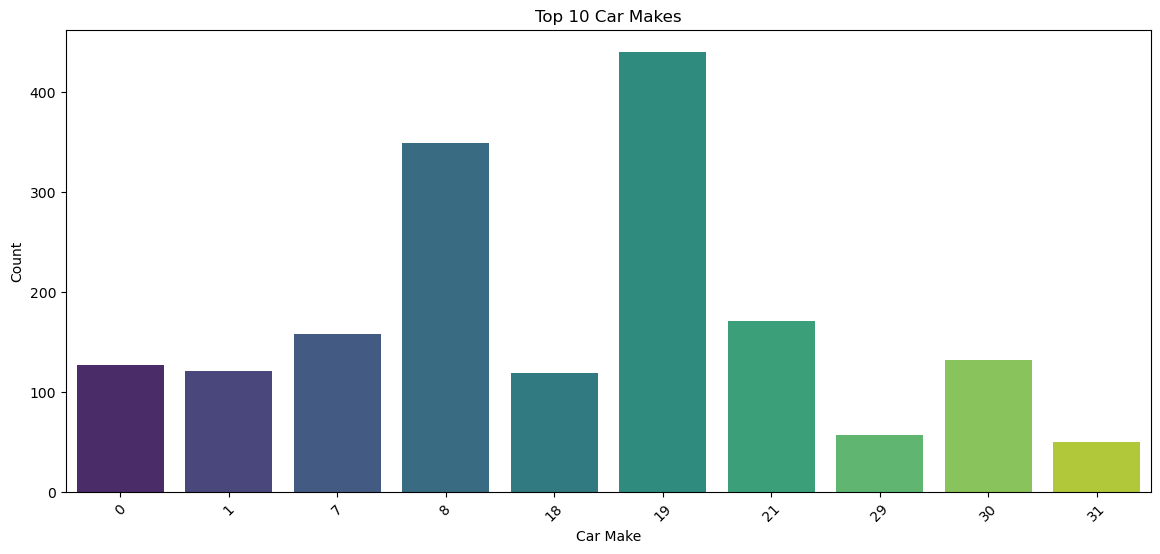

In [169]:
# Plot the count of the top 10 car makes
plt.figure(figsize=(14, 6))
top_makes = df['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title("Top 10 Car Makes")
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


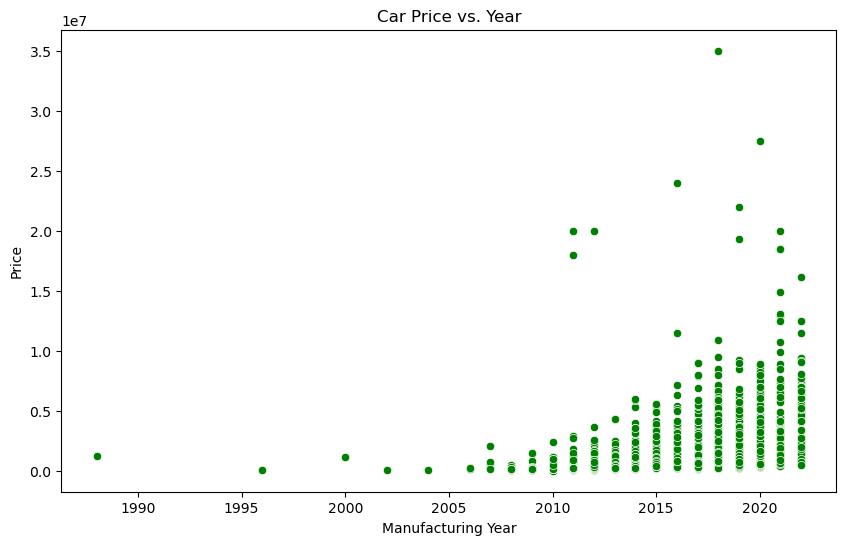

In [173]:
# Scatter plot: Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df, color='green')
plt.title("Car Price vs. Year")
plt.xlabel("Manufacturing Year")
plt.ylabel("Price")
plt.show()



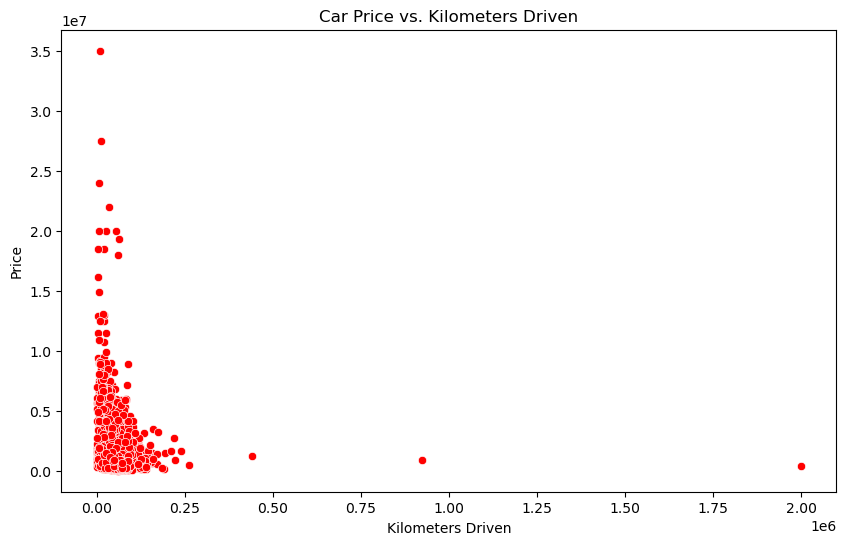

In [178]:
# Scatter plot: Price vs. Kilometer Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometer', y='Price', data=df, color='red')
plt.title("Car Price vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()



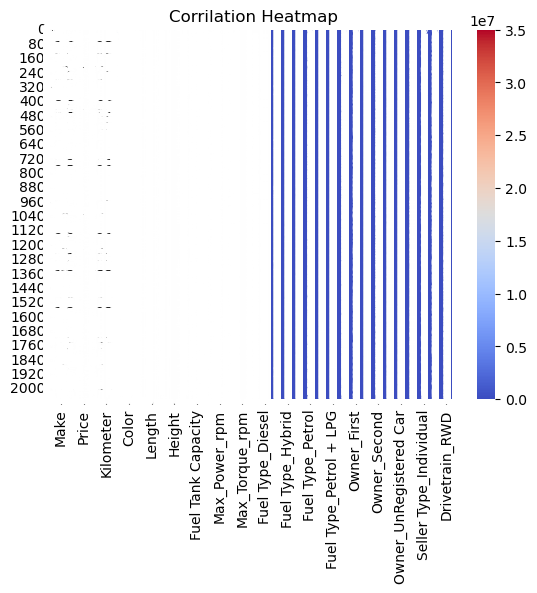

In [177]:
# Create the heatmap
sns.heatmap(df, cmap='coolwarm', annot=True)

# Add a title and show the plot
plt.title("Corrilation Heatmap")
plt.show()


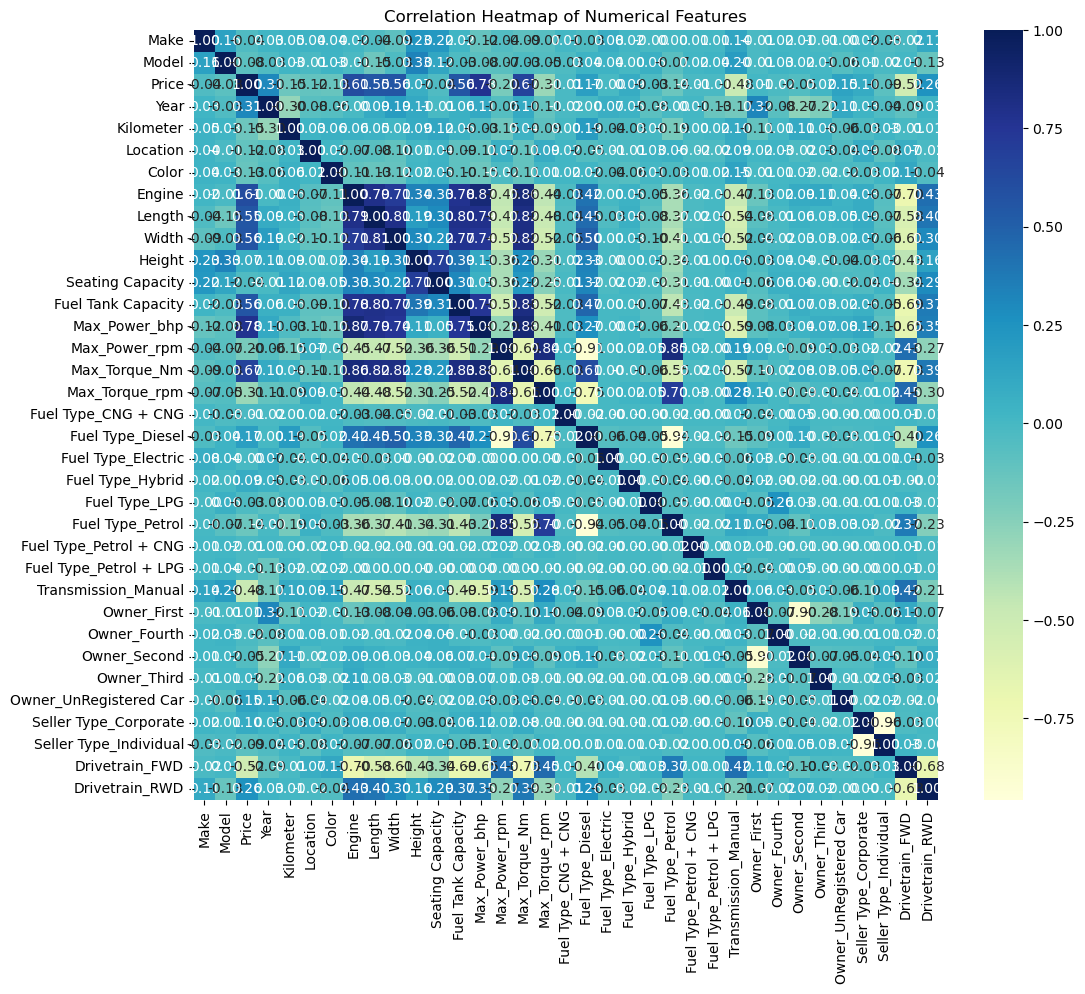

In [187]:
# Correlation Analysis Among Numerical Features

# A correlation heatmap helps to pinpoint relationships between numeric features. For instance, we want to know how variables like Year and Kilometer relate to Price.

# Select numerical columns and compute correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## Splitting the data into dependent and independent variables

In [181]:
# dependent and independent variables
x = df.drop('Price', axis=1)
y = df.Price

#### train test split

In [184]:
# train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Model Training

### Linear Regression Model

In [25]:
# initializing the model

from sklearn.linear_model import LinearRegression

In [26]:
# initializing the model

LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [27]:
# make predictions
y_pred_LR = LR.predict(x_test)

In [28]:
y_pred_LR

array([ 4.41183434e+06,  9.30201487e+05,  1.61748580e+05,  1.59747466e+06,
        7.59020486e+05,  1.20798199e+05,  1.54905541e+06,  1.66237210e+06,
        2.33847435e+06,  5.15977923e+06,  6.37612756e+05,  5.05446975e+05,
        1.18311333e+06,  5.98548266e+06,  5.94152129e+05, -9.30866675e+05,
        1.39013161e+06,  7.19824919e+05,  2.45810470e+06,  1.10485721e+05,
        3.91447900e+06,  6.62791141e+05,  1.04517958e+06,  6.32850526e+05,
        4.71209920e+05,  1.91111729e+06,  1.63622290e+06,  4.13283850e+06,
        2.20475881e+06,  4.67599307e+04,  1.97053619e+06,  3.66553008e+06,
        3.74384487e+06,  3.93088756e+05,  2.14625151e+05,  8.47541823e+05,
        2.97351932e+04,  4.92398784e+06,  4.00143022e+05,  2.14063200e+06,
        1.35675337e+06, -1.57332514e+05,  3.96674012e+06,  1.13887345e+05,
       -8.45387484e+04,  7.93529834e+06,  3.88355155e+06,  1.09112380e+05,
        7.06036650e+05,  3.07670483e+06,  2.51633330e+06,  4.62781866e+06,
        1.26034201e+05,  

In [29]:
# Evaluation parameters
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_LR)
r2 = r2_score(y_test,  y_pred_LR)
print(f'MSE: {mse} \nRMSE: {rmse} \nMAE: {mae} \nR2: {r2}')

MSE: 2309642368068.252 
RMSE: 1519750.758535179 
MAE: 741390.731322518 
R2: 0.6769895381748434


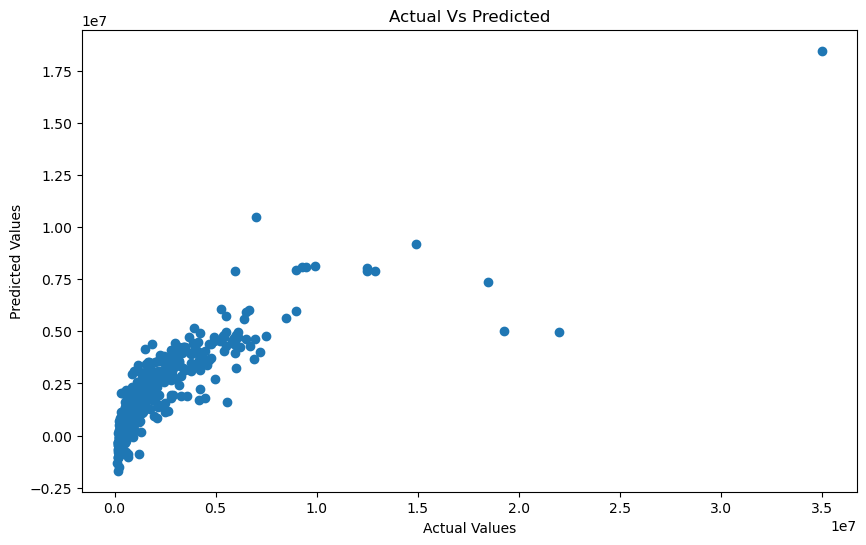

In [31]:
# plot the scatter plot to find the relation between actual values and predicted values

plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_LR)
plt.title("Actual Vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show() 

In [32]:
LR.coef_

array([ 2.01636331e+04, -1.44747116e+02,  1.46304469e+05, -1.95039508e+00,
       -1.98106114e+03,  3.65249603e+03, -6.96703313e+02, -3.06522132e+02,
       -1.28903715e+03,  7.01517553e+02, -2.36387077e+05,  8.14327210e+03,
        3.55633823e+04, -2.08545462e+02, -1.34612410e+03,  1.11441513e+02,
        4.86264860e+05, -2.41435103e+05, -1.53496524e+06,  4.43290054e+06,
        3.20768070e+05, -3.69881168e+05,  2.53785402e-08,  1.40756984e+06,
       -2.78831756e+03, -7.54531060e+05,  4.79728575e+05, -8.42507660e+05,
       -3.88822080e+05, -1.42320747e+05,  3.29063341e+05,  1.67555313e+05,
       -4.51684339e+05, -2.47234101e+04])

In [33]:
x.columns

Index(['Make', 'Model', 'Year', 'Kilometer', 'Location', 'Color', 'Engine',
       'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'Max_Power_bhp', 'Max_Power_rpm', 'Max_Torque_Nm', 'Max_Torque_rpm',
       'Fuel Type_CNG + CNG', 'Fuel Type_Diesel', 'Fuel Type_Electric',
       'Fuel Type_Hybrid', 'Fuel Type_LPG', 'Fuel Type_Petrol',
       'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG',
       'Transmission_Manual', 'Owner_First', 'Owner_Fourth', 'Owner_Second',
       'Owner_Third', 'Owner_UnRegistered Car', 'Seller Type_Corporate',
       'Seller Type_Individual', 'Drivetrain_FWD', 'Drivetrain_RWD'],
      dtype='object')

In [34]:
coefficients = pd.DataFrame({'Features': x.columns, 'Coefficients': LR.coef_}).sort_values(by = 'Coefficients', ascending = False)

In [35]:
print(coefficients)

                  Features  Coefficients
19        Fuel Type_Hybrid  4.432901e+06
23  Fuel Type_Petrol + LPG  1.407570e+06
16     Fuel Type_CNG + CNG  4.862649e+05
26            Owner_Fourth  4.797286e+05
30   Seller Type_Corporate  3.290633e+05
20           Fuel Type_LPG  3.207681e+05
31  Seller Type_Individual  1.675553e+05
2                     Year  1.463045e+05
12           Max_Power_bhp  3.556338e+04
0                     Make  2.016363e+04
11      Fuel Tank Capacity  8.143272e+03
5                    Color  3.652496e+03
9                   Height  7.015176e+02
15          Max_Torque_rpm  1.114415e+02
22  Fuel Type_Petrol + CNG  2.537854e-08
3                Kilometer -1.950395e+00
1                    Model -1.447471e+02
13           Max_Power_rpm -2.085455e+02
7                   Length -3.065221e+02
6                   Engine -6.967033e+02
8                    Width -1.289037e+03
14           Max_Torque_Nm -1.346124e+03
4                 Location -1.981061e+03
24     Transmiss

C:\Users\User\AppData\Local\Temp\ipykernel_12736\807573810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Coefficients', y = 'Features', data = coefficients, palette= 'deep')


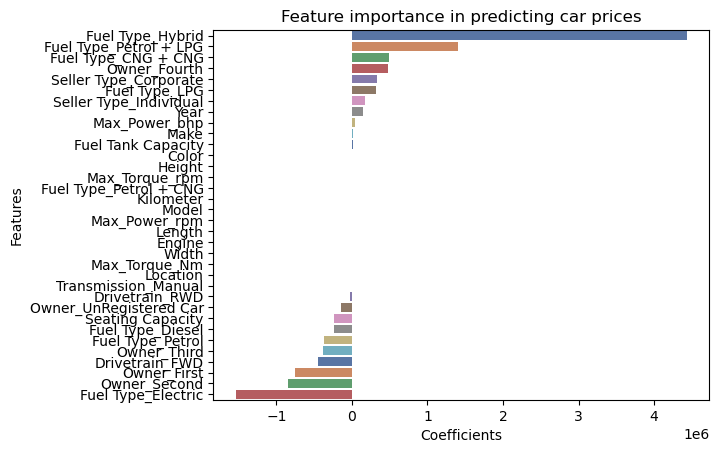

In [36]:

plt.figurefisize = (10,6)
sns.barplot(x = 'Coefficients', y = 'Features', data = coefficients, palette= 'deep')
plt.title('Feature importance in predicting car prices')
plt.yticks()
plt.show()

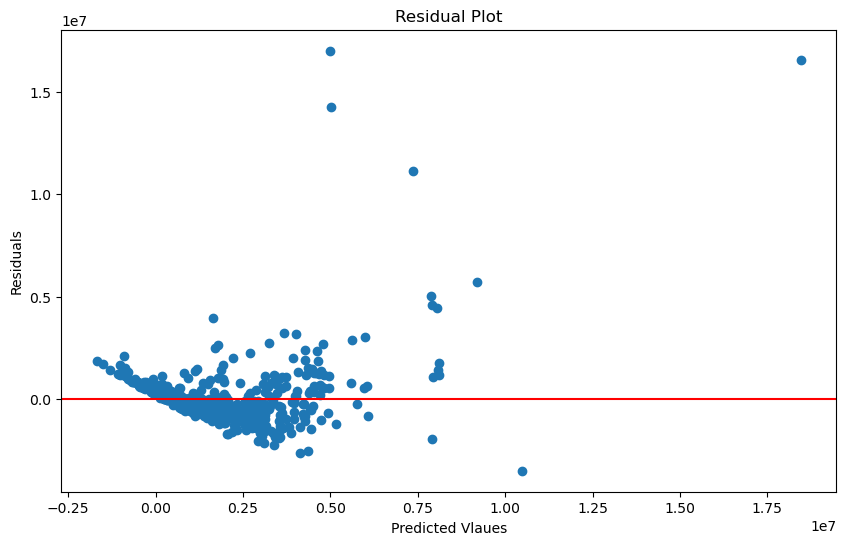

In [37]:
# calculate the residuals(errors)

residuals = y_test - y_pred_LR

# plot the residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred_LR,residuals)
plt.axhline(y= 0,color ='r',linestyle = '-')
plt.xlabel('Predicted Vlaues')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

________________________________________________________________________

### KNN Regressor Model

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [42]:
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

In [43]:
print("-----------------------------------------")
print(f"Training score : {r2_score(y_train, y_pred_knn_train)}")
print(f"Testing score : {r2_score(y_test, y_pred_knn_test)}")
print("-----------------------------------------")

-----------------------------------------
Training score : 0.6302861175524335
Testing score : 0.28315585747725036
-----------------------------------------


In [44]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [45]:
# initialize
scalar = StandardScaler()

In [46]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [47]:
x_train_scaled

array([[ 1.82182374,  1.11578407, -0.40482457, ..., -5.44606045,
         0.63276277, -0.42675109],
       [ 1.60603811, -0.89909982, -0.69826128, ...,  0.18361897,
         0.63276277, -0.42675109],
       [ 0.41921713,  1.33677134, -0.991698  , ...,  0.18361897,
         0.63276277, -0.42675109],
       ...,
       [ 0.41921713, -1.41257023,  0.18204887, ...,  0.18361897,
         0.63276277, -0.42675109],
       [-1.52285357, -1.65305638, -0.69826128, ...,  0.18361897,
        -1.5803711 ,  2.34328637],
       [ 0.41921713, -0.49937286,  0.47548559, ...,  0.18361897,
        -1.5803711 ,  2.34328637]])

k=1, MSE=9732019117666.715
k=2, MSE=8760071029414.288
k=3, MSE=7402192284554.526
k=4, MSE=6849763877464.45
k=5, MSE=6872725988715.259
k=6, MSE=6641695389135.611
k=7, MSE=6442226185856.068
k=8, MSE=6331846190573.875
k=9, MSE=6147422058838.676
k=10, MSE=6231823999277.071


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: User

k=11, MSE=6193069639147.927
k=12, MSE=6325704466392.714
k=13, MSE=6511195707704.88
k=14, MSE=6637791457013.753
k=15, MSE=6756105201210.261
k=16, MSE=6968666210419.244
k=17, MSE=6998333064672.818
k=18, MSE=6948117892549.071
k=19, MSE=6867527323184.721
k=20, MSE=6819905043047.241


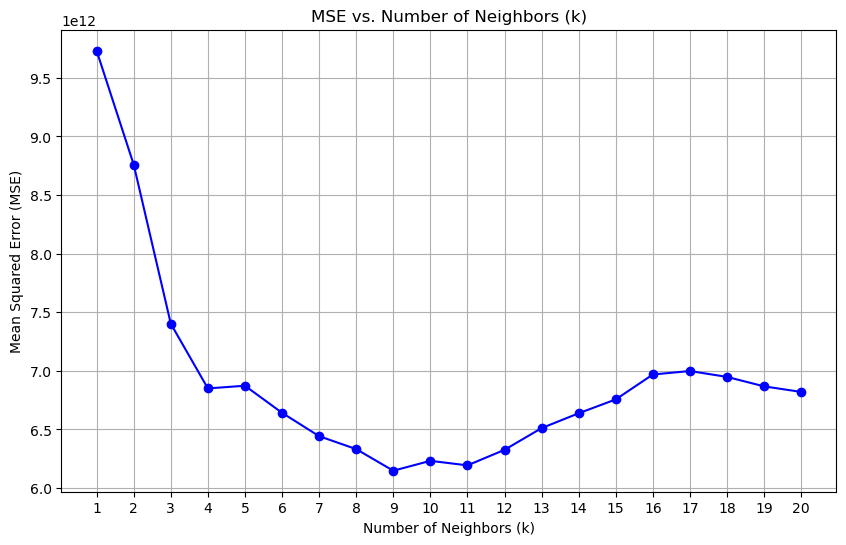

In [48]:
import matplotlib.pyplot as plt

mse_values = []

# Define range for k
k_range = range(1, 21)

# Loop through different values of k
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)  # Train the model
    y_pred = knn.predict(x_test)  # Predict on test data
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    mse_values.append(mse)  # Append MSE value to list
    print(f"k={k}, MSE={mse}")  # Print MSE for current k

# Plot MSE vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_range)  # Show all k values on x-axis
plt.grid(True)
plt.show()


In [49]:
# Training the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)

knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [50]:
# Predict on test data
pred2_train_knn = knn.predict(x_train_scaled)
pred2_test_knn = knn.predict(x_test_scaled)

In [51]:
print("-----------------------------------------")
print(f"Training score : {r2_score(y_train, pred2_train_knn)}")
print(f"Testing score : {r2_score(y_test, pred2_test_knn)}")
print("-----------------------------------------")

-----------------------------------------
Training score : 0.7130498345552043
Testing score : 0.6184355762092082
-----------------------------------------


__________________________________________________________________________

### Decision Tree Model

In [54]:
# grid search cv

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

In [55]:
dt_regressor = DecisionTreeRegressor()

parameters = {
    'criterion' :["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ['best','random'],
    'max_depth' :[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features' :["auto","sqrt","log2"]
}

In [56]:
# GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeRegressor()

gscv = GridSearchCV(treemodel,param_grid=parameters, cv=5,scoring='r2')

gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [57]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [128]:
dt_reg_model = DecisionTreeRegressor(criterion='squared_error',max_depth=11, max_features='log2',splitter='best')

In [129]:
dt_reg_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='log2')

In [141]:
# Prediction of model

y_pred_train_dt = dt_reg_model.predict(x_train)

y_pred_test_dt = dt_reg_model.predict(x_test)

In [143]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print(f'Training Score : {r2_score(y_pred_train_dt,y_train)}')
print(f'Testing Score : {r2_score(y_pred_test_dt,y_test)}')

Training Score : 0.9854303282902622
Testing Score : 0.4848653016350998


____________________________________________________________________________

## Random Forest

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [149]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [151]:
y_pred_rf = rf.predict(x_test)


In [153]:
# R2 Score
r2 = r2_score(y_test, y_pred_rf)

# MAE
mae = mean_absolute_error(y_test, y_pred_rf)

rsme = np.sqrt(mae)

In [155]:
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8543
MAE: 311200.5141
RMSE: 1519750.7585


## Model Evaluation

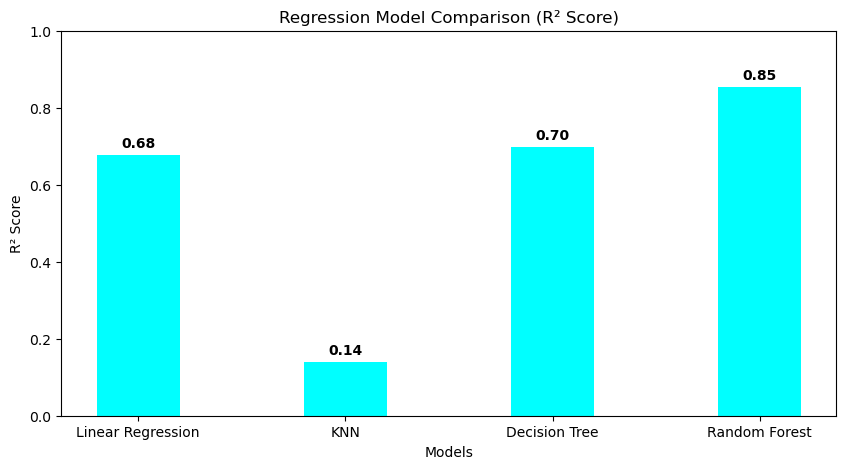

In [71]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Predicted values from each model (replace with your own variables)
y_pred_LR = LR.predict(x_test)
pred2_test_knn =knn.predict(x_test)
y_pred_test_dt = dt_reg_model.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Calculate R2 scores
r2_scores = [
    r2_score(y_test, y_pred_LR),
    r2_score(y_test, pred2_test_knn),
    r2_score(y_test, y_pred_test_dt),
    r2_score(y_test, y_pred_rf)
]

# Plot
plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color='cyan', width=0.4)
# Annotate R² values on bars
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Regression Model Comparison (R² Score)')
plt.ylim(0, 1)  # Optional: to make chart scale uniform
plt.show()
